# Fremont Bridge Bicycle Counter

### Problem:
The Fremont Bridge Bicycle Counter began operation in October 2012 and records the number of bikes that cross the bridge using the pedestrian/bicycle pathways. Inductive loops on the east and west pathways count the passing of bicycles regardless of travel direction. The data consists of a date/time field: Date, east pathway count field: Fremont Bridge NB, and west pathway count field: Fremont Bridge SB. The count fields represent the total bicycles detected during the specified one hour period. Direction of travel is not specified, but in general most traffic in the Fremont Bridge NB field is travelling northbound and most traffic in the Fremont Bridge SB field is travelling southbound.


### Question: 

1. Find the total bicycles detected during the specified one hour period of time.
2. The total number of bicyclists traveling on the East sidewalk in one hour as recorded by the sensor.
3. The total number of bicyclists traveling on the West sidewalk in one hour as recorded by the sensor.
4. Find the average traffic as a function of the time of day.
5. how things change based on the day of the week.
6. Find the weekday traffic and plot it
7. Find the weekend traffic and plot it
8. Give strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.


In [1]:
# Start writing code here...

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

**By using API**

In [6]:
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.seattle.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.seattle.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("65db-xm6k")

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

**Download and Load**

* [Data](https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k)

In [9]:
data = pd.read_csv("Data/Fremont_Bridge_Bicycle_Counter.csv",index_col='Date',parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [10]:
data.columns = ['Total','East','West']
data.head()

,Total,East,West
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [14]:
data.isnull().sum()

Total    22
East     22
West     22
dtype: int64

In [12]:
df = data.dropna()

In [13]:
df.isnull().sum()

Total    0
East     0
West     0
dtype: int64

Text(0, 0.5, 'Hourly Bicycle Count')

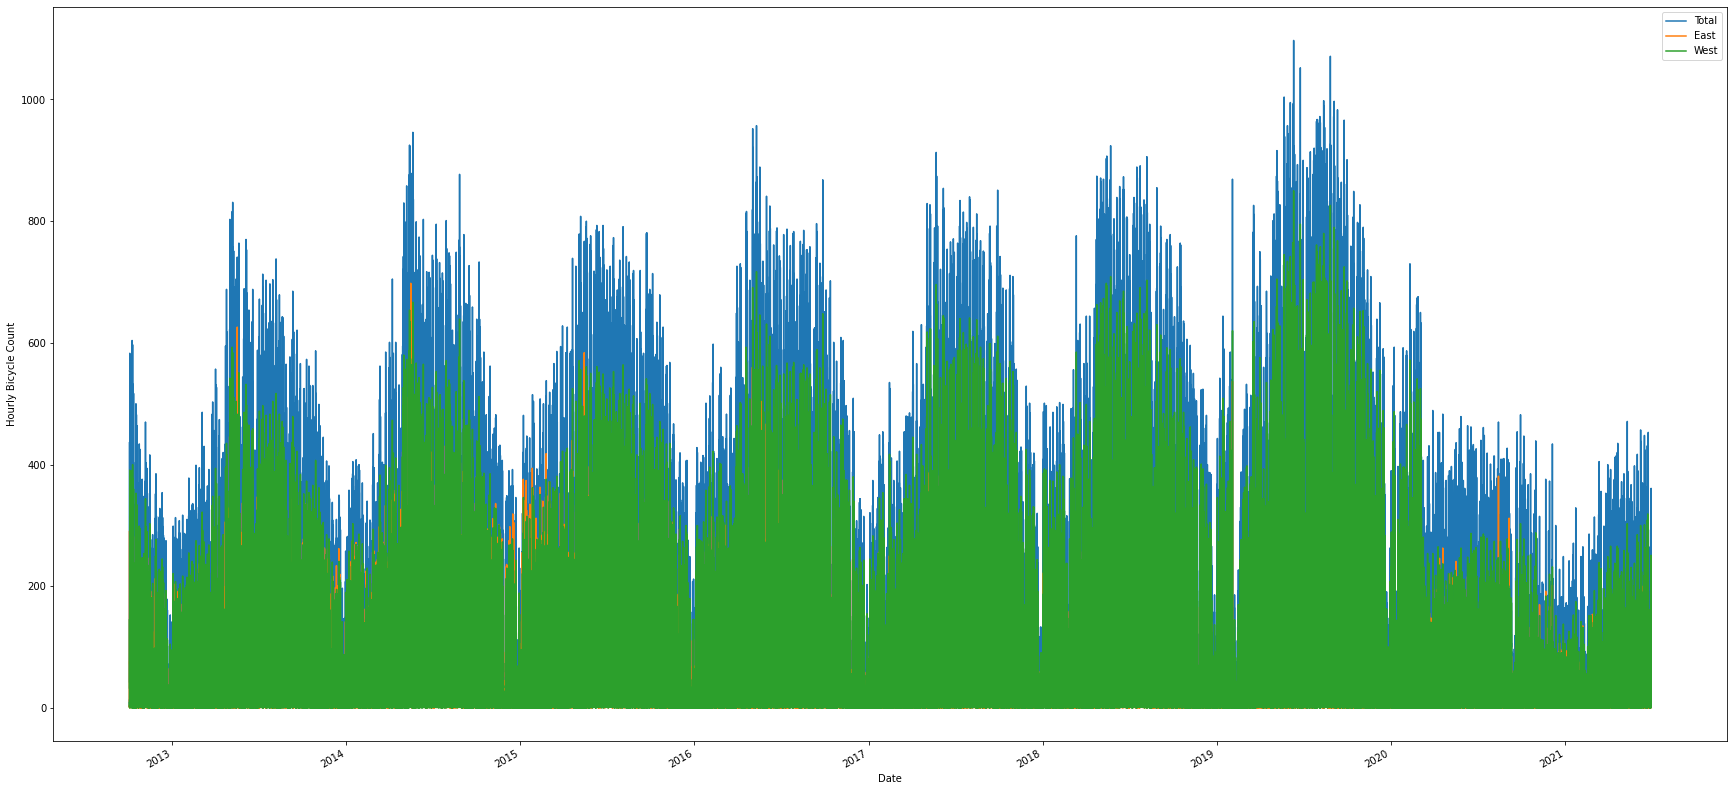

In [16]:
df.plot(figsize=(30,15))
plt.ylabel("Hourly Bicycle Count")

Text(0, 0.5, 'Daily bicycle count')

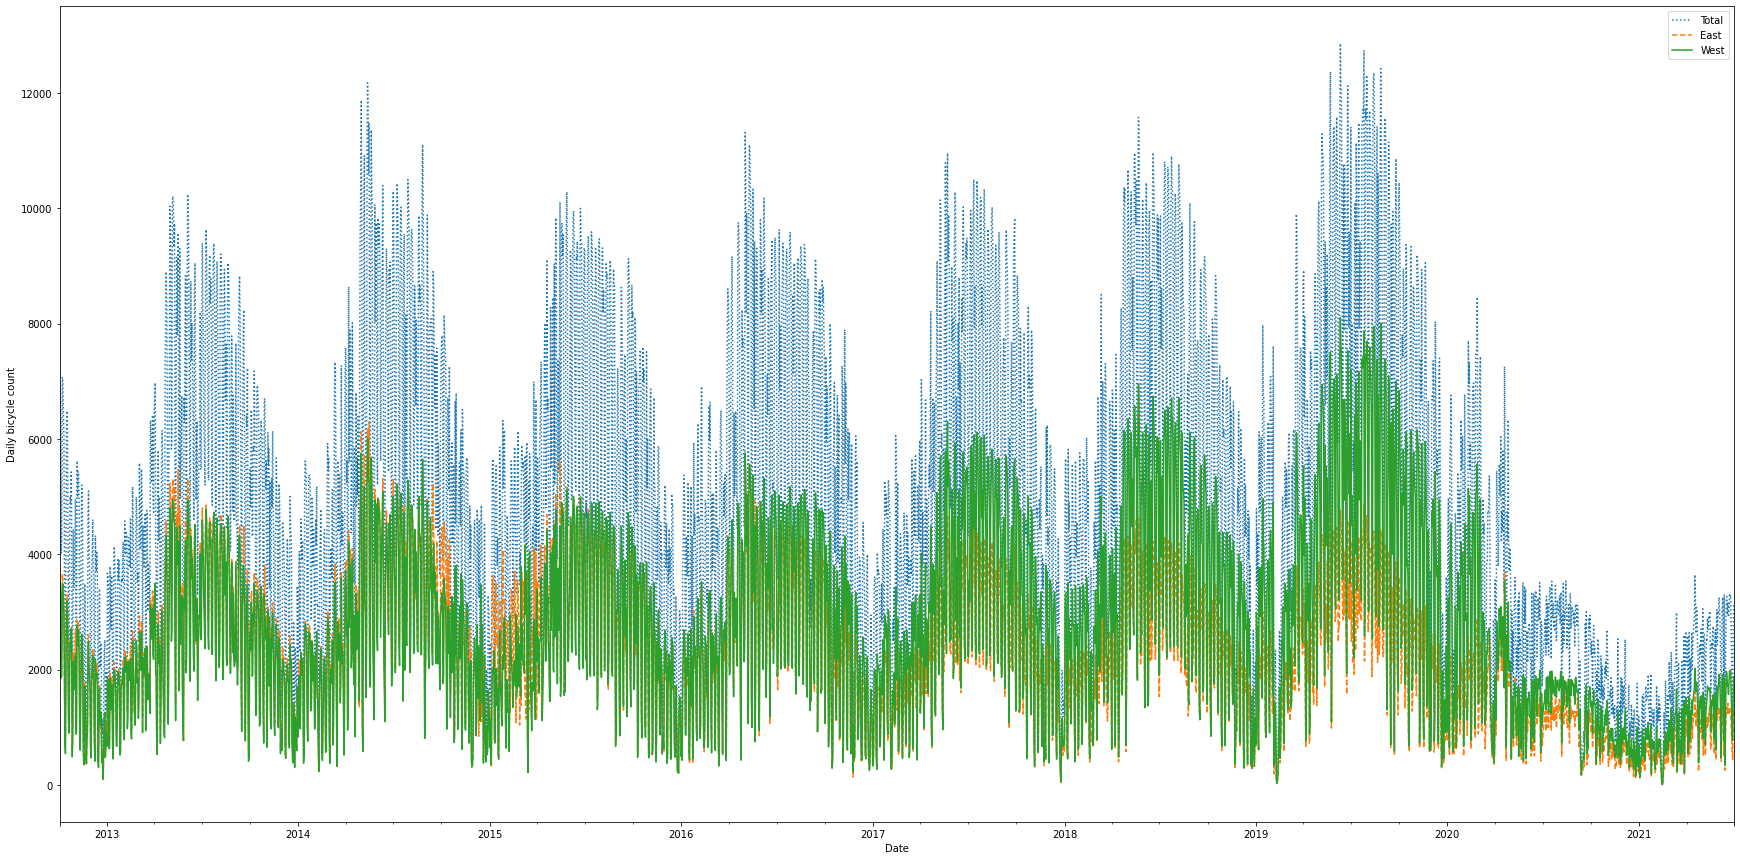

In [18]:
daily = df.resample('D').sum()
daily.plot(figsize=(30,15),style=[':', '--', '-'])
plt.ylabel('Daily bicycle count')

Text(0, 0.5, 'Weekly bicycle count')

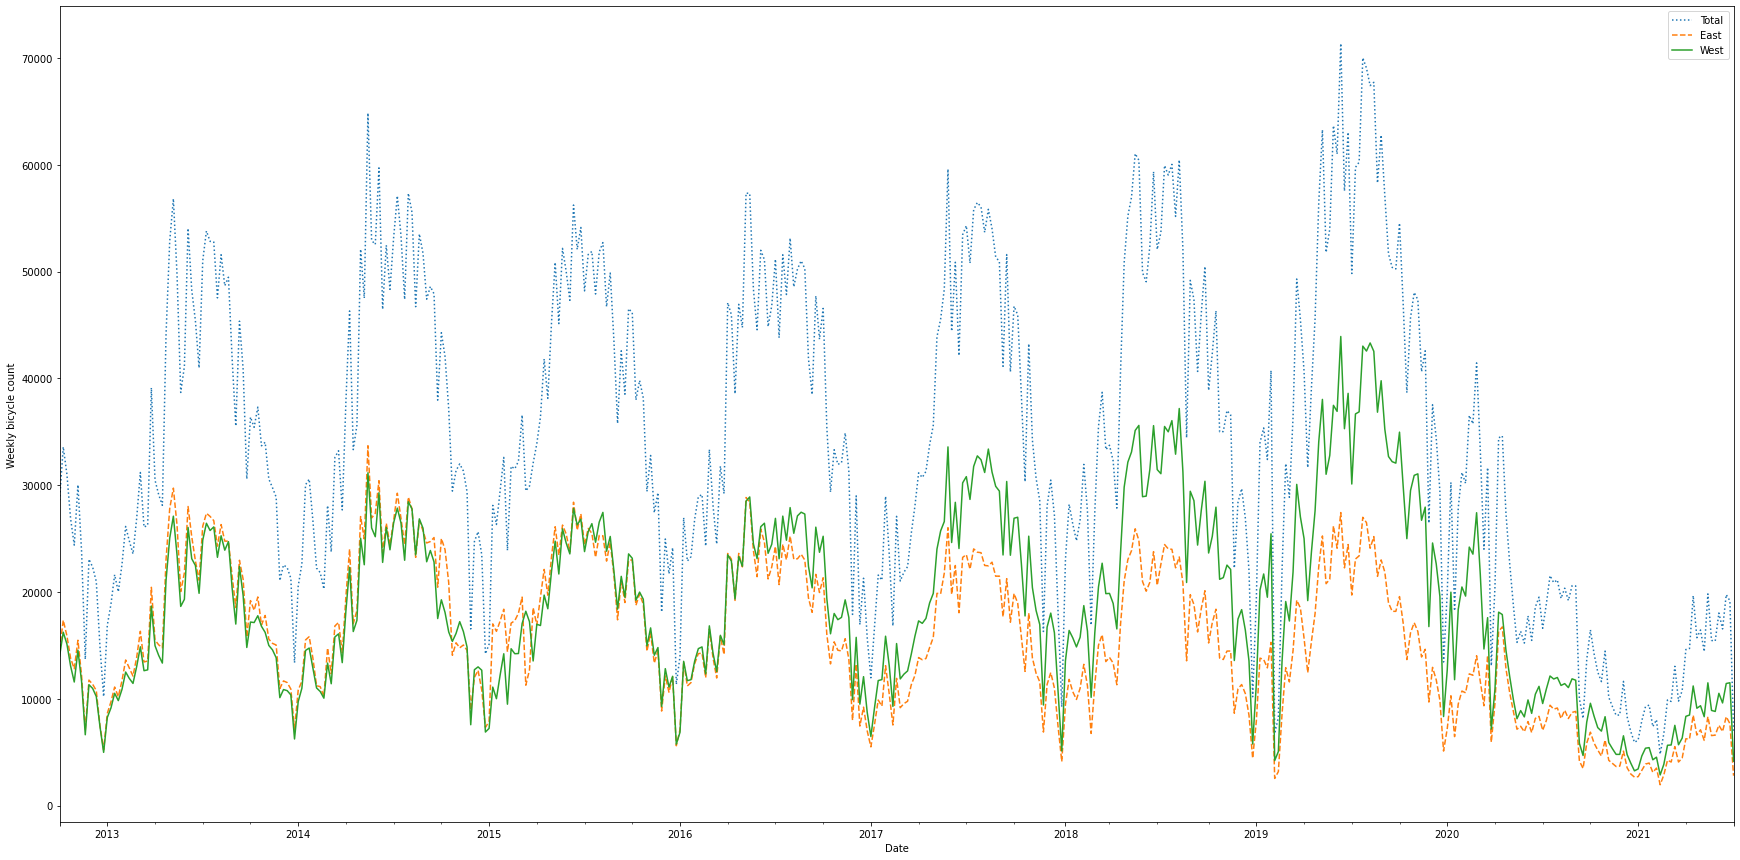

In [17]:
weekly = df.resample('W').sum()
weekly.plot(figsize=(30,15),style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')

Text(0, 0.5, 'mean hourly count')

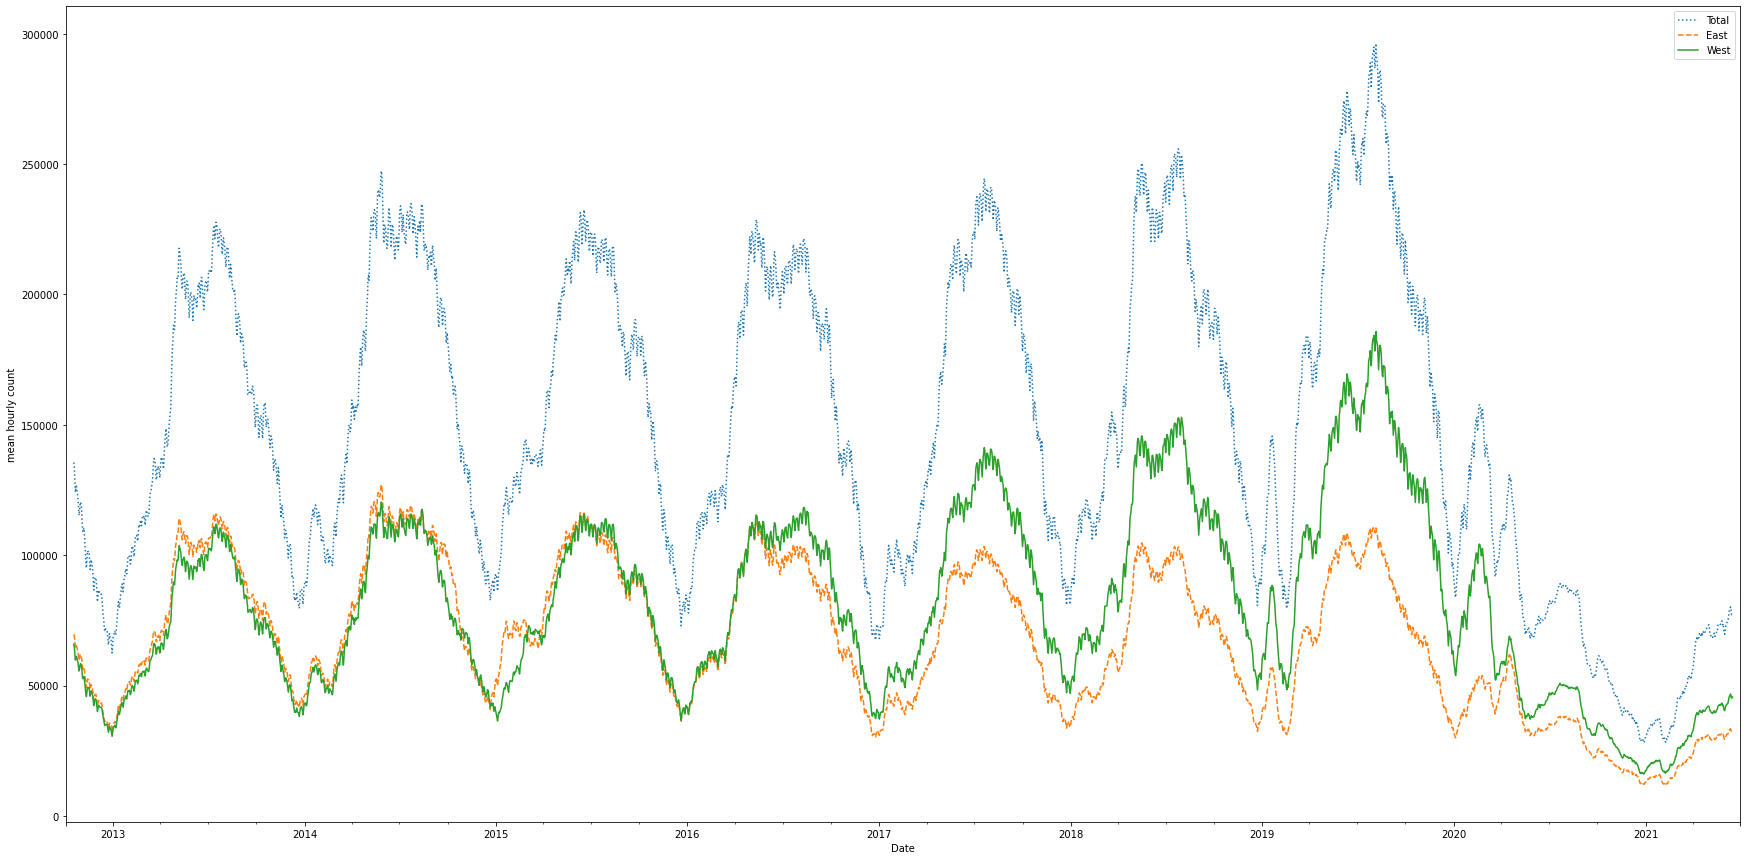

In [19]:
# Find on avg how many bicycle are going in 30 days
daily = df.resample('D').sum()
daily.rolling(30,center=True).sum().plot(figsize=(30,15),style=[':', '--', '-'])
plt.ylabel('mean hourly count')

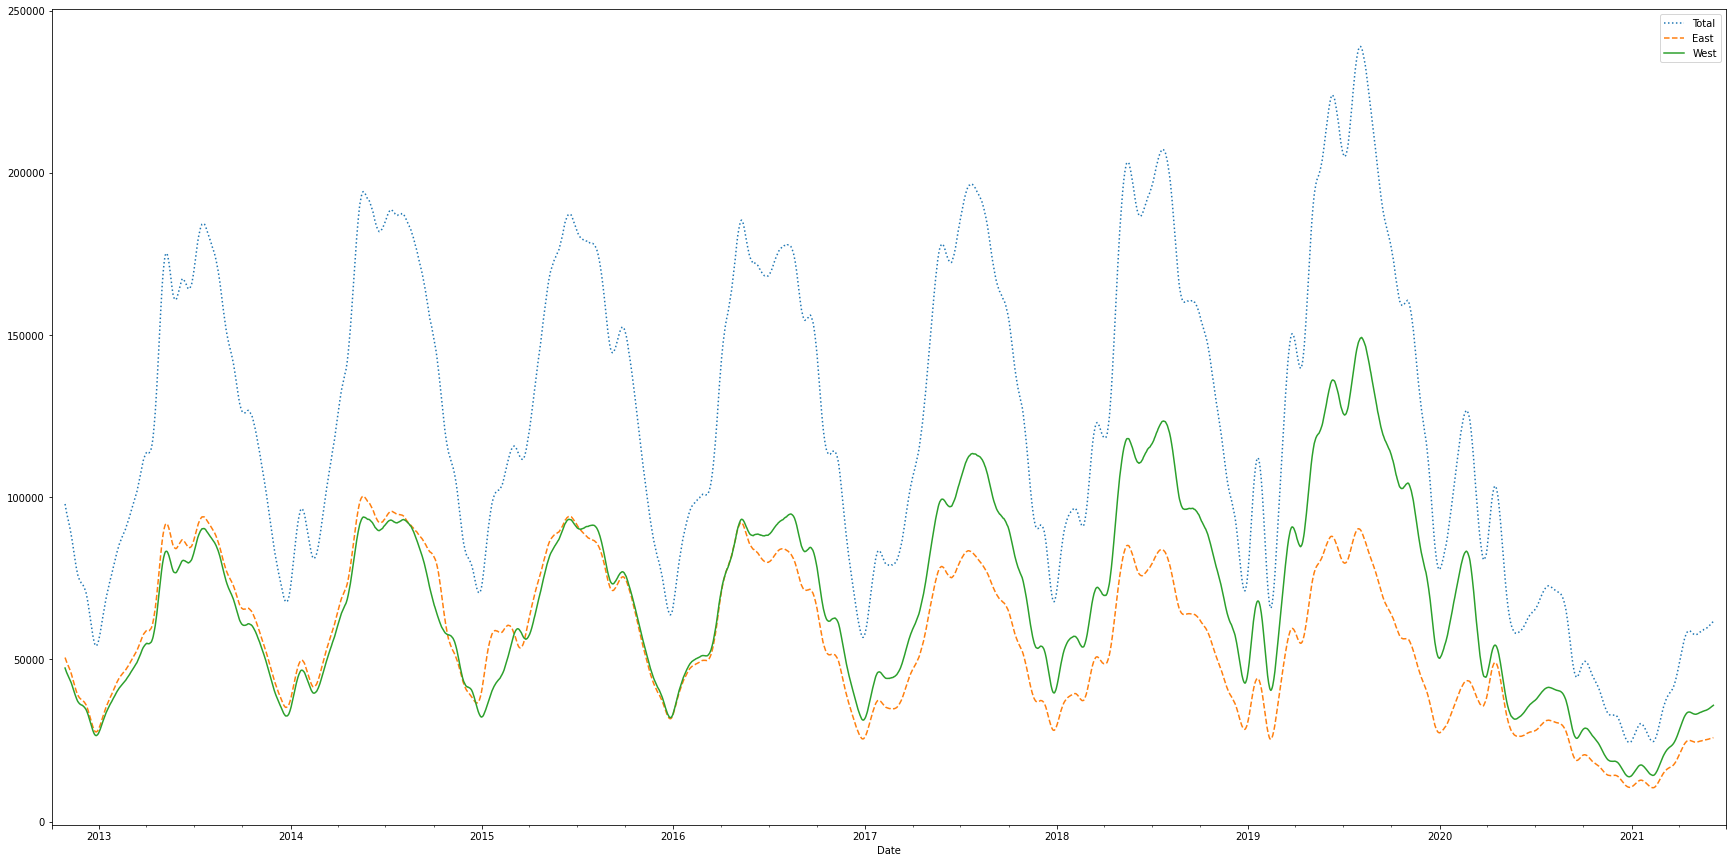

In [21]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'],figsize=(30,15));

<AxesSubplot:xlabel='time'>

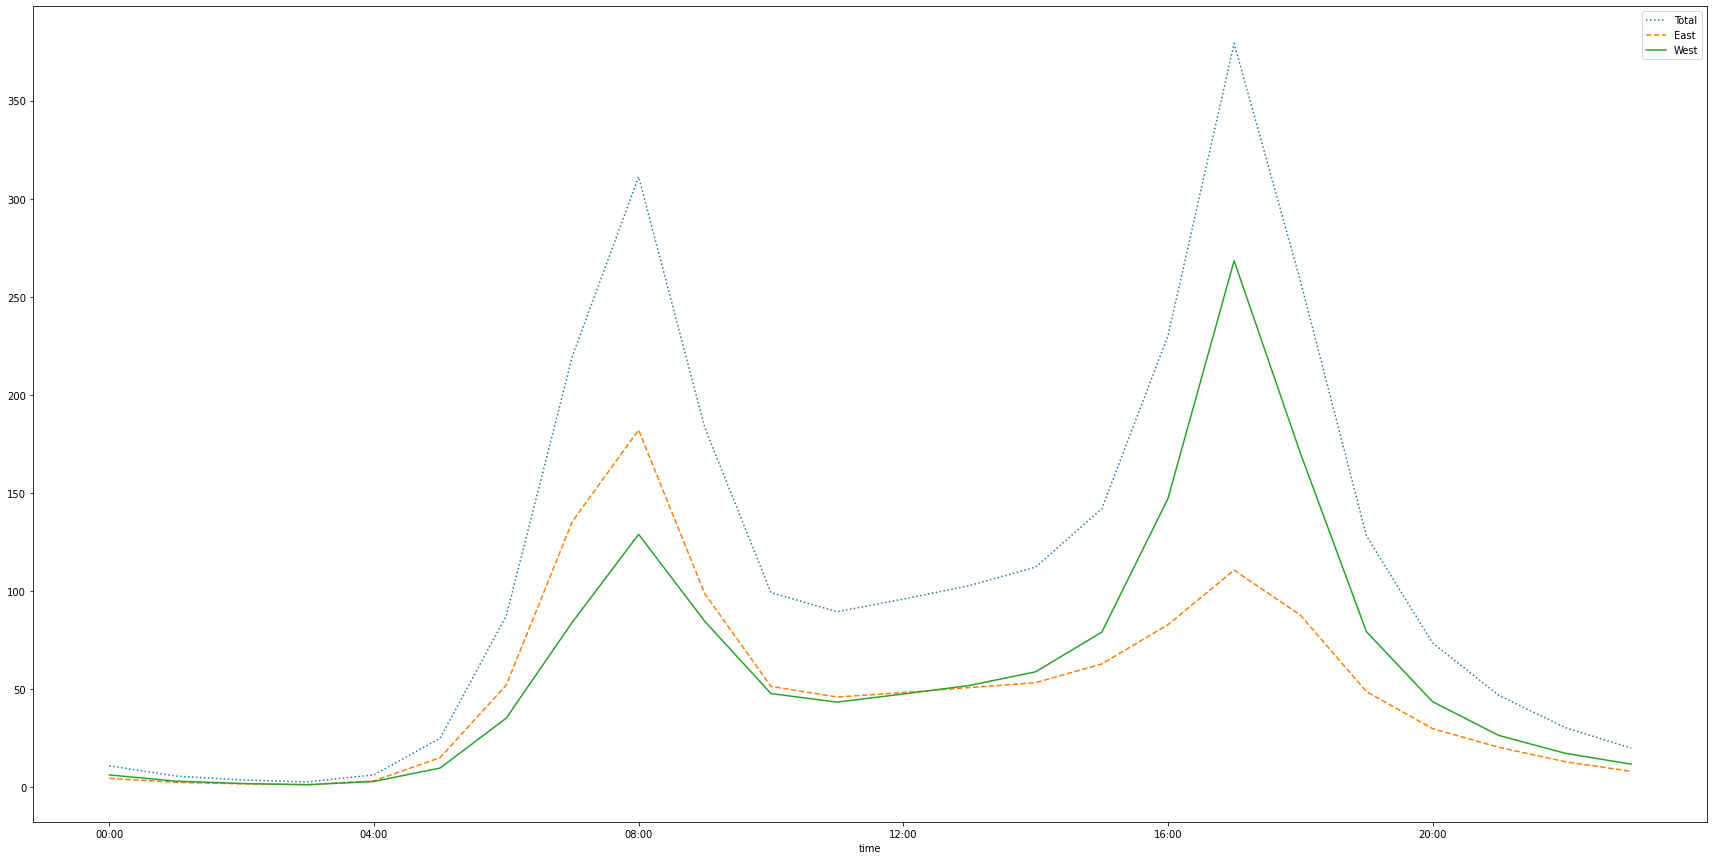

In [22]:
# average traffic as a function of the time of day

by_time = df.groupby(df.index.time).mean()
hourly_ticks  = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks = hourly_ticks,figsize=(30,15),style=[':', '--', '-'])

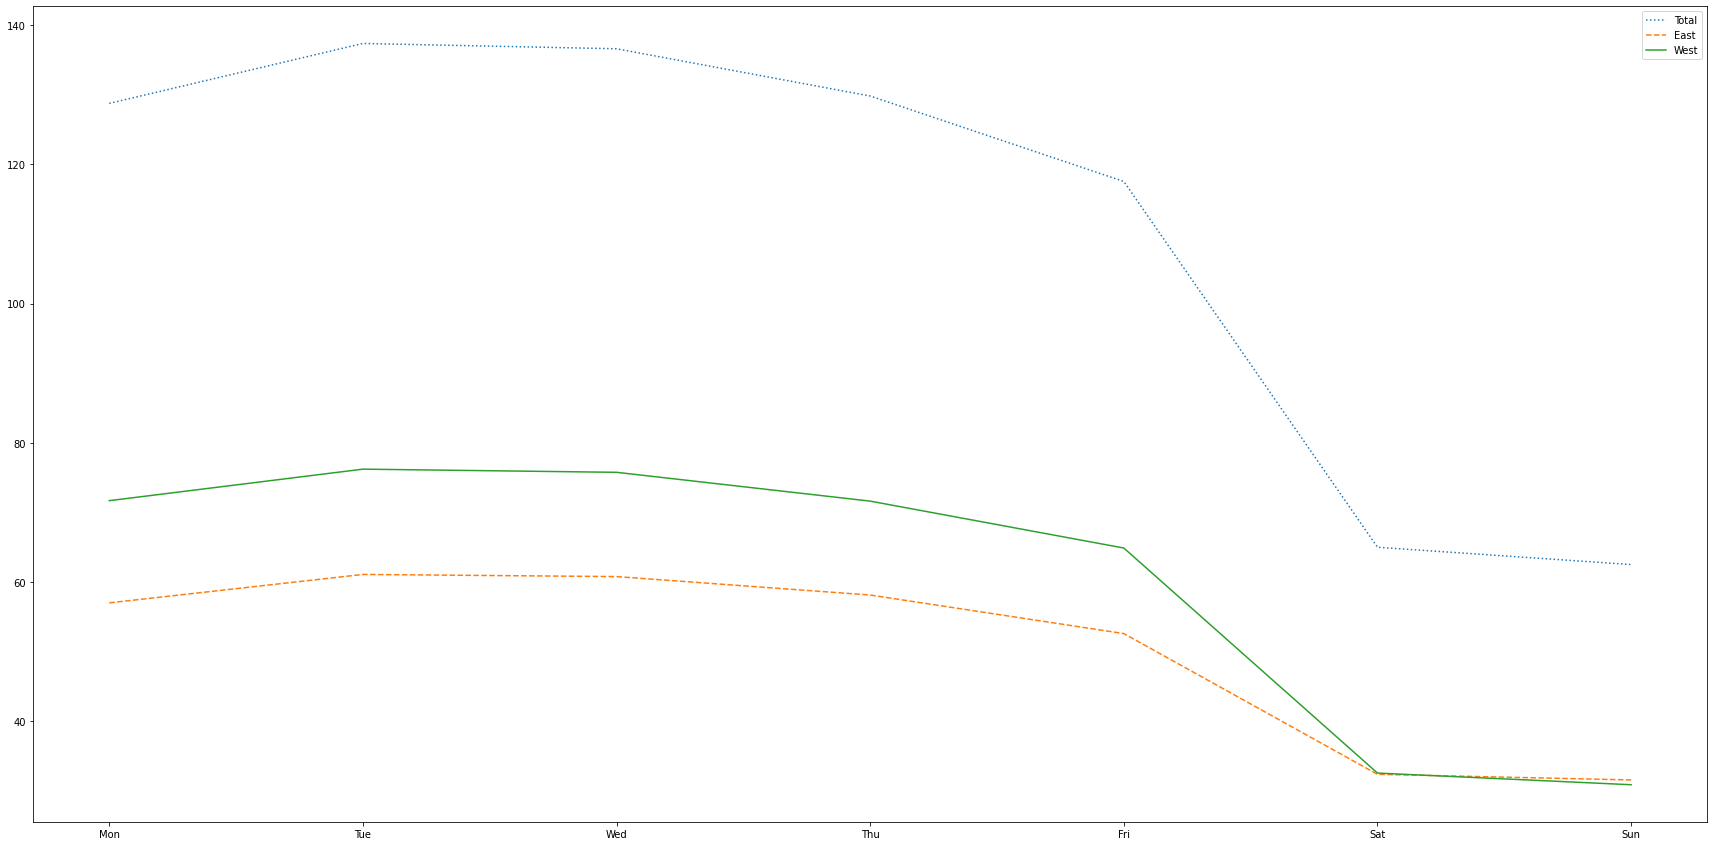

In [25]:
# how things change based on the day of the week.
by_weekday  = df.groupby(df.index.day_of_week).mean()
by_weekday.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
by_weekday.plot(style=[':', '--', '-'],figsize=(30,15))

In [31]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()
by_time

Total        East        West
Weekday 00:00:00    9.186178    3.929008    5.257170
        01:00:00    4.551951    2.035026    2.516925
        02:00:00    3.027504    1.485190    1.542313
        03:00:00    2.595910    1.350729    1.245181
        04:00:00    7.444523    4.070287    3.374236
        05:00:00   32.160790   19.709450   12.451340
        06:00:00  115.750588   69.869770   45.880818
        07:00:00  294.831688  183.198872  111.632816
        08:00:00  411.655853  242.624824  169.031030
        09:00:00  223.764346  121.154280  102.610066
        10:00:00   98.617357   50.777516   47.839840
        11:00:00   76.223424   39.155456   37.067968
        12:00:00   79.767874   39.845720   39.922154
        13:00:00   86.266573   42.003056   44.263517
        14:00:00   97.994122   44.746532   53.247590
        15:00:00  140.330355   58.525747   81.804609
        16:00:00  268.553021   89.203151  179.349871
        17:00:00  486.584764  133.070303  353.514460
        18:00:00  327.820362  106.147190  221.673172
        19:00:00  156.554432   57.130026   99.424406
        20:00:00   86.619092   34.199624   52.419469
        21:00:00   54.088878   23.255584   30.833294
        22:00:00   34.120386   14.496826   19.623560
        23:00:00   21.286856    8.652481   12.634376
Weekend 00:00:00   15.573529    6.451765    9.121765
        01:00:00    8.961765    3.981176    4.980588
        02:00:00    5.793594    2.675563    3.118031
        03:00:00    3.360588    1.682941    1.677647
        04:00:00    3.724706    1.540588    2.184118
        05:00:00    7.303529    3.856471    3.447059
        06:00:00   16.814118    7.862941    8.951176
        07:00:00   32.403529   16.542941   15.860588
        08:00:00   59.785294   31.013529   28.771765
        09:00:00   82.241765   42.518235   39.723529
        10:00:00  101.057059   53.251176   47.805882
        11:00:00  122.885882   63.397059   59.488824
        12:00:00  136.481765   69.612941   66.868824
        13:00:00  144.322941   73.095882   71.227059
        14:00:00  148.137059   75.010588   73.126471
        15:00:00  146.259412   73.891765   72.367647
        16:00:00  133.903529   67.206471   66.697059
        17:00:00  110.403529   54.828235   55.575294
        18:00:00   84.678824   42.151765   42.527059
        19:00:00   57.211176   28.017647   29.193529
        20:00:00   41.121765   19.334706   21.787059
        21:00:00   29.057059   13.435882   15.621176
        22:00:00   21.601176    9.688235   11.912941
        23:00:00   16.892941    6.974706    9.918235

<AxesSubplot:title={'center':'Weekends'}, xlabel='time'>

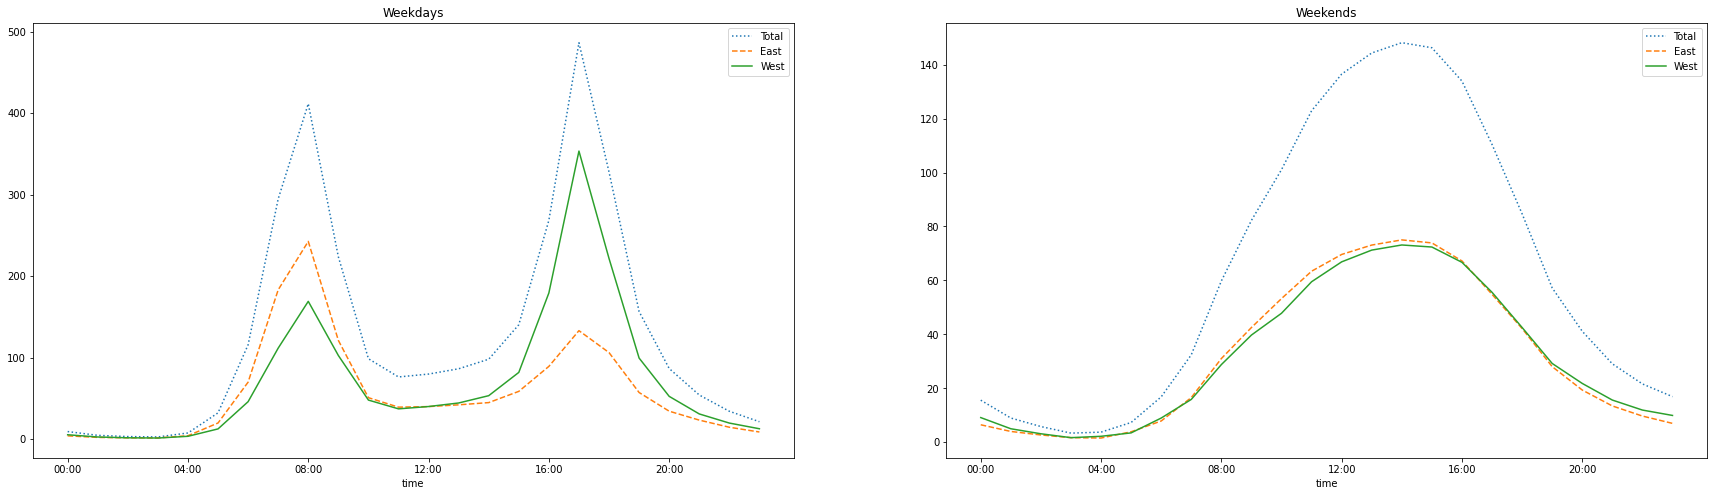

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(30, 8))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f5f90ba1-3290-463e-8fc6-44108f4fa21b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>